In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First I load the following libraries into my notebook

In [2]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd


Task 1: Load Data

I input the data path usuing the data from my google drive folder.

Then I plot my data.


In [6]:
Chicago_parcels = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/chicago_parcels/Chicago_parcels.shp')

Task 2:

Using the head() method I display the first 4 rows of data.

In [8]:
Chicago_parcels.shape

(592521, 6)

In [7]:
#Task 2
Chicago_parcels.head(4)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."


Task 3:
I import the lonboard and other relevant libraries. I also add the SolidPolygonlayer.

In [11]:
from lonboard import Map, SolidPolygonLayer

In [ ]:
Chicago_parcels.shape

In [12]:
#Task 3
# A GeoDataFrame with Polygon geometries
layer = SolidPolygonLayer.from_geopandas(
    Chicago_parcels,
    get_fill_color=[255, 0, 0],
)
map_ = Map(layers=[layer])


/usr/local/lib/python3.10/dist-packages/lonboard/_layer.py:112: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


In [14]:
map_

Map(layers=[SolidPolygonLayer(get_fill_color=[255, 0, 0], table=pyarrow.Table
POLY_ID: uint32
ID: uint32
AREA:…

In [31]:
print(Chicago_parcels.columns)

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry'], dtype='object')


Task 4:

First I had to make a new column in my data that represents centroids.

Then I make two new columns to represent the x and y, latitude and longitude.

Then I need correlate these data points

In [26]:
#Task 4

Centroids = Chicago_parcels.centroid

In [42]:
Chicago_parcels.assign(Centroid = Centroids)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,Centroid
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",POINT (1091780.062 1943041.685)
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",POINT (1092426.507 1943134.441)
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",POINT (1091688.490 1942695.301)
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",POINT (1091538.184 1942342.716)
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",POINT (1091543.397 1942082.620)
...,...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873...",POINT (1198345.480 1832294.386)
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158...",POINT (1198484.292 1832295.456)
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787...",POINT (1198674.118 1832296.782)
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615...",POINT (1198812.925 1832298.304)


In [46]:
Chicago_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [47]:
Chicago_parcels['Centroid'] = Chicago_parcels.geometry.centroid
Chicago_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,Centroid
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",POINT (1091780.062 1943041.685)
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",POINT (1092426.507 1943134.441)
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",POINT (1091688.490 1942695.301)
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",POINT (1091538.184 1942342.716)
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",POINT (1091543.397 1942082.620)


In [48]:
Chicago_parcels['Lat'] = Chicago_parcels['Centroid'].x
Chicago_parcels['Long'] = Chicago_parcels['Centroid'].y
Chicago_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,Centroid,Lat,Long
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",POINT (1091780.062 1943041.685),1.091780e+06,1.943042e+06
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",POINT (1092426.507 1943134.441),1.092427e+06,1.943134e+06
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",POINT (1091688.490 1942695.301),1.091688e+06,1.942695e+06
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",POINT (1091538.184 1942342.716),1.091538e+06,1.942343e+06
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",POINT (1091543.397 1942082.620),1.091543e+06,1.942083e+06


Task 5:

For task 5 i used an n_cluster of 3 first and a cluster of 7 and used the kmeans clustering and plot my centroids.

Task 6: I used the show function to visualise my results and changed the colour ramps

In [36]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

NameError: ignored

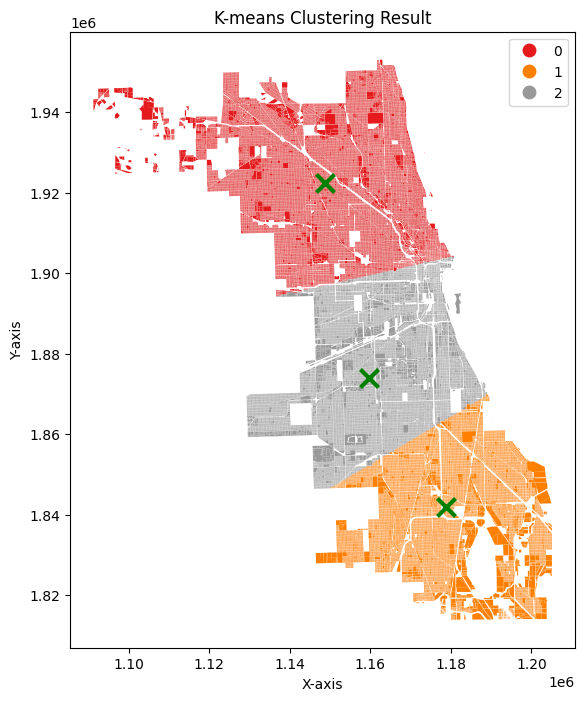

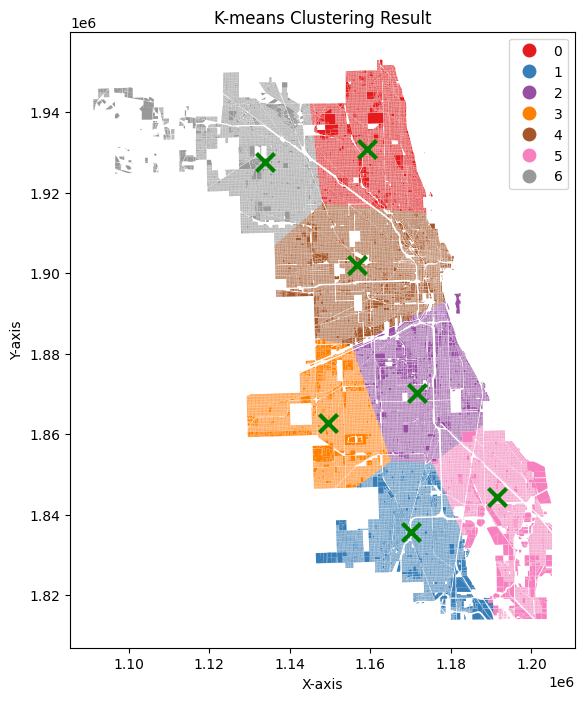

In [54]:
#Task 5
kmeans = KMeans(n_clusters=3,)
Chicago_parcels['kmeans_cluster'] = kmeans.fit_predict(Chicago_parcels[['Lat', 'Long']])

# Visualize K-means clustering result
Chicago_parcels.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="g",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

kmeans = KMeans(n_clusters=7,)
Chicago_parcels['kmeans_cluster'] = kmeans.fit_predict(Chicago_parcels[['Lat', 'Long']])

# Visualize K-means clustering result
Chicago_parcels.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="g",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#Task 6

show()
